In [1]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [2]:
path = "/content/drive/MyDrive/Diabetes/diabetes_prediction_dataset.csv"

In [3]:
import pandas as pd

In [4]:
df = pd.read_csv(path)

In [5]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [6]:
df.tail()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0
99999,Female,57.0,0,0,current,22.43,6.6,90,0


In [7]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [8]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [9]:
df.diabetes.value_counts()

0    91500
1     8500
Name: diabetes, dtype: int64

In [10]:
91500+8500

100000

In [11]:
8500/91500

0.09289617486338798

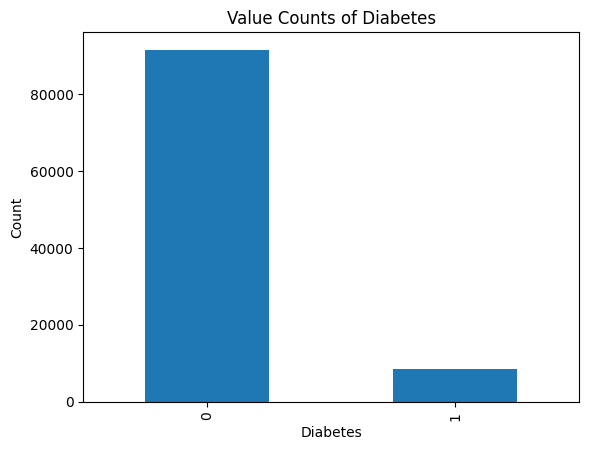

In [12]:
import matplotlib.pyplot as plt

# get the value counts of the 'diabetes' column
counts = df.diabetes.value_counts()

# plot the value counts as a bar chart
counts.plot(kind='bar')

# add labels and title to the plot
plt.xlabel('Diabetes')
plt.ylabel('Count')
plt.title('Value Counts of Diabetes')

# show the plot
plt.show()

<ipython-input-13-a4984788391b>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = df.corr()['diabetes']


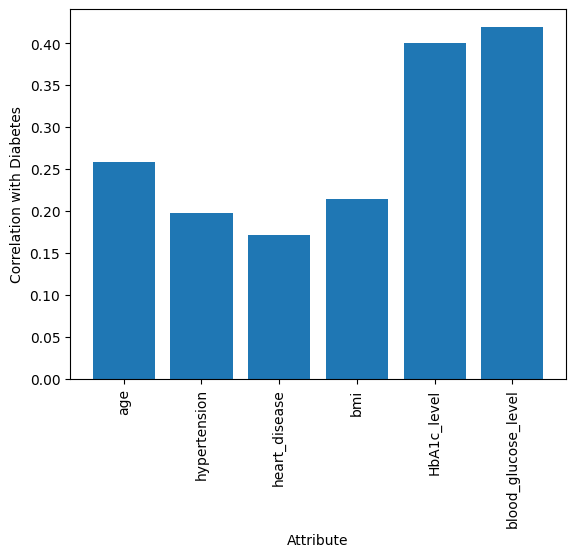

In [13]:
# Compute the correlation between each attribute and the diabetes label
correlations = df.corr()['diabetes']

# Remove the 'diabetes' label from the correlations list
correlations = correlations.drop('diabetes')

# Create a bar chart showing the correlations
plt.bar(correlations.index, correlations.values)
plt.xticks(rotation=90)
plt.xlabel('Attribute')
plt.ylabel('Correlation with Diabetes')
plt.show()

In [14]:
from sklearn.utils import resample
#create two different dataframe of majority and minority class 
df_majority = df[(df['diabetes']==0)] 
df_minority = df[(df['diabetes']==1)] 
# upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,    # sample with replacement
                                 n_samples= 91500, # to match majority class
                                 random_state=42)  # reproducible results
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_minority_upsampled, df_majority])

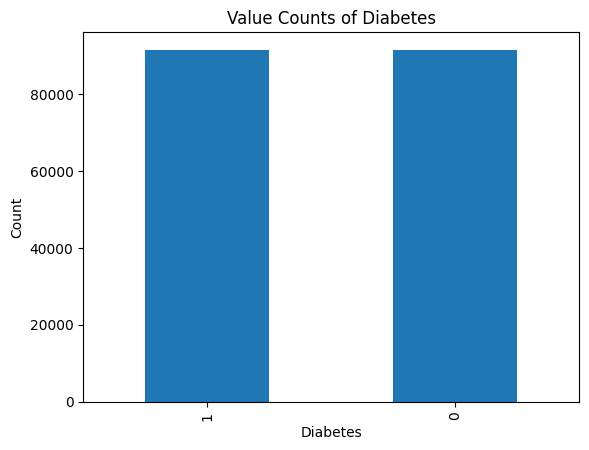

In [15]:
import matplotlib.pyplot as plt

# get the value counts of the 'diabetes' column
counts = df_upsampled.diabetes.value_counts()

# plot the value counts as a bar chart
counts.plot(kind='bar')

# add labels and title to the plot
plt.xlabel('Diabetes')
plt.ylabel('Count')
plt.title('Value Counts of Diabetes')

# show the plot
plt.show()

In [16]:
X = df_upsampled.drop('diabetes',axis='columns')

In [17]:
y = df_upsampled.diabetes

In [18]:
X.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
85651,Male,54.0,0,0,ever,34.32,6.5,200
10023,Female,60.0,0,0,No Info,17.91,8.2,126
62129,Female,60.0,0,0,never,39.28,6.5,155
59844,Male,55.0,0,0,former,33.14,5.8,126
66421,Female,46.0,0,0,No Info,27.32,7.5,130


In [19]:
y.head()

85651    1
10023    1
62129    1
59844    1
66421    1
Name: diabetes, dtype: int64

In [20]:
X.gender.unique()

array(['Male', 'Female', 'Other'], dtype=object)

In [21]:
X.smoking_history.unique()

array(['ever', 'No Info', 'never', 'former', 'not current', 'current'],
      dtype=object)

In [22]:
X = pd.get_dummies(X)

In [23]:
X.columns

Index(['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level',
       'blood_glucose_level', 'gender_Female', 'gender_Male', 'gender_Other',
       'smoking_history_No Info', 'smoking_history_current',
       'smoking_history_ever', 'smoking_history_former',
       'smoking_history_never', 'smoking_history_not current'],
      dtype='object')

In [24]:
len(X.columns)

15

In [25]:
X.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,gender_Female,gender_Male,gender_Other,smoking_history_No Info,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
85651,54.0,0,0,34.32,6.5,200,0,1,0,0,0,1,0,0,0
10023,60.0,0,0,17.91,8.2,126,1,0,0,1,0,0,0,0,0
62129,60.0,0,0,39.28,6.5,155,1,0,0,0,0,0,0,1,0
59844,55.0,0,0,33.14,5.8,126,0,1,0,0,0,0,1,0,0
66421,46.0,0,0,27.32,7.5,130,1,0,0,1,0,0,0,0,0


In [26]:
X.tail()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,gender_Female,gender_Male,gender_Other,smoking_history_No Info,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
99995,80.0,0,0,27.32,6.2,90,1,0,0,1,0,0,0,0,0
99996,2.0,0,0,17.37,6.5,100,1,0,0,1,0,0,0,0,0
99997,66.0,0,0,27.83,5.7,155,0,1,0,0,0,0,1,0,0
99998,24.0,0,0,35.42,4.0,100,1,0,0,0,0,0,0,1,0
99999,57.0,0,0,22.43,6.6,90,1,0,0,0,1,0,0,0,0


In [27]:
y.head()

85651    1
10023    1
62129    1
59844    1
66421    1
Name: diabetes, dtype: int64

In [28]:
y.tail()

99995    0
99996    0
99997    0
99998    0
99999    0
Name: diabetes, dtype: int64

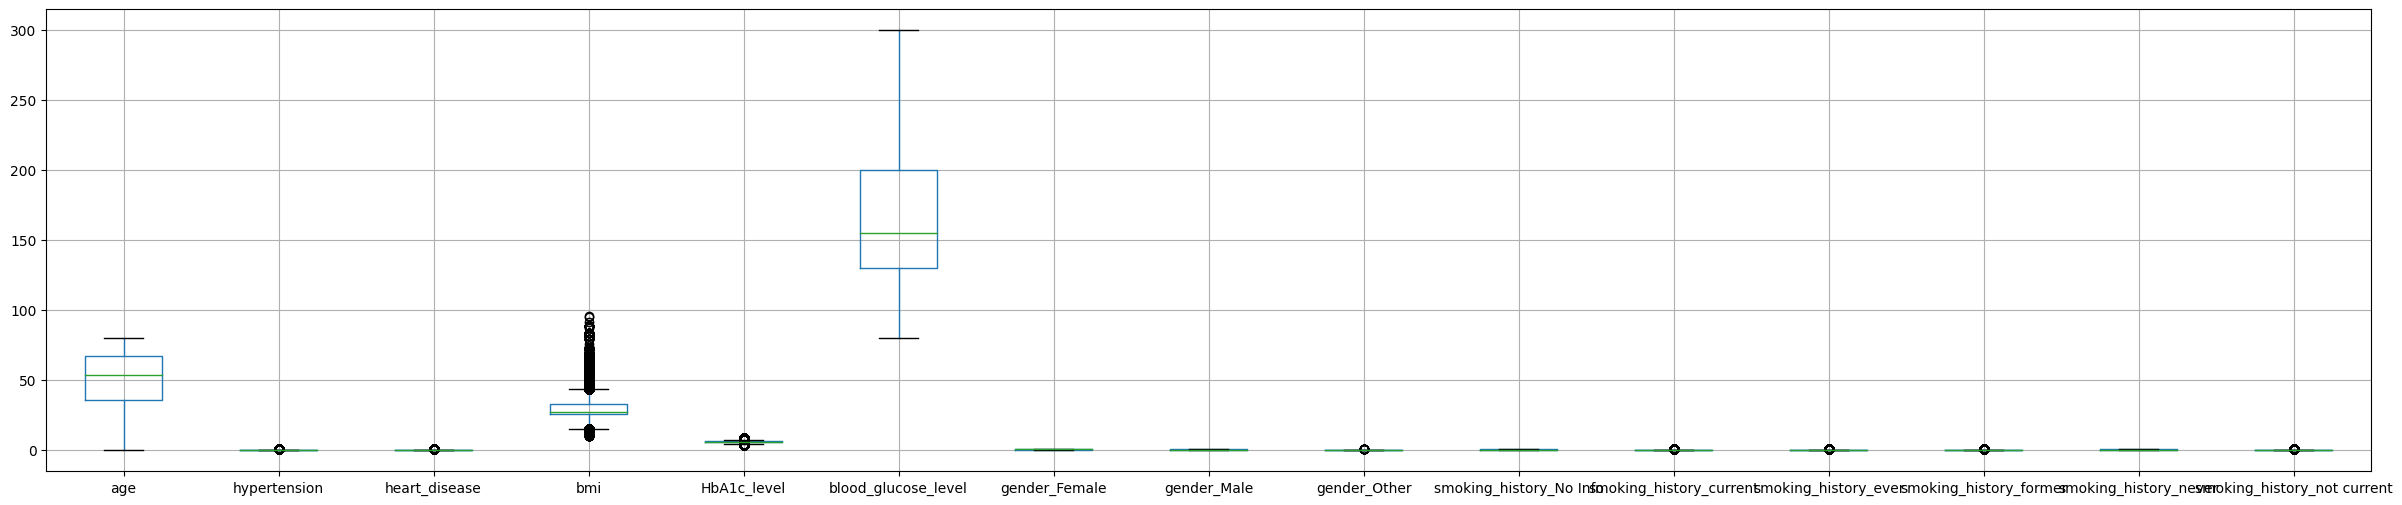

In [29]:
# Create larger figure
fig = plt.figure(figsize=(30, 6))

# Create box plot
X.boxplot()

# Show plot
plt.show()

In [30]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)

StandardScaler()

In [31]:
scaler.transform(X)

array([[ 0.16231066, -0.4270291 , -0.31339312, ..., -0.39552743,
        -0.76667047, -0.27872521],
       [ 0.44109489, -0.4270291 , -0.31339312, ..., -0.39552743,
        -0.76667047, -0.27872521],
       [ 0.44109489, -0.4270291 , -0.31339312, ..., -0.39552743,
         1.30434135, -0.27872521],
       ...,
       [ 0.71987911, -0.4270291 , -0.31339312, ...,  2.52826964,
        -0.76667047, -0.27872521],
       [-1.23161046, -0.4270291 , -0.31339312, ..., -0.39552743,
         1.30434135, -0.27872521],
       [ 0.30170278, -0.4270291 , -0.31339312, ..., -0.39552743,
        -0.76667047, -0.27872521]])

In [32]:
X_scaled = scaler.transform(X)

In [33]:
X_scaled.shape

(183000, 15)

In [34]:
X_scaled

array([[ 0.16231066, -0.4270291 , -0.31339312, ..., -0.39552743,
        -0.76667047, -0.27872521],
       [ 0.44109489, -0.4270291 , -0.31339312, ..., -0.39552743,
        -0.76667047, -0.27872521],
       [ 0.44109489, -0.4270291 , -0.31339312, ..., -0.39552743,
         1.30434135, -0.27872521],
       ...,
       [ 0.71987911, -0.4270291 , -0.31339312, ...,  2.52826964,
        -0.76667047, -0.27872521],
       [-1.23161046, -0.4270291 , -0.31339312, ..., -0.39552743,
         1.30434135, -0.27872521],
       [ 0.30170278, -0.4270291 , -0.31339312, ..., -0.39552743,
        -0.76667047, -0.27872521]])

In [35]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, stratify = y, test_size=0.25, random_state=42)

In [36]:
X_train.shape

(137250, 15)

In [37]:
X_test.shape

(45750, 15)

In [38]:
y_train.shape

(137250,)

In [39]:
y_test.shape

(45750,)

In [40]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


dt = DecisionTreeClassifier(random_state=10)
knn = KNeighborsClassifier(n_neighbors=2, algorithm='auto')
rf = RandomForestClassifier(n_estimators=3)



In [41]:
dt_history = dt.fit(X_train,y_train)
knn_history = knn.fit(X_train,y_train)
rf_history = rf.fit(X_train,y_train)


In [42]:
dt_pred = dt.predict(X_test)
knn_pred = knn.predict(X_test)
rf_pred = rf.predict(X_test)


In [43]:
from sklearn.metrics import accuracy_score

# Print the accuracy scores for each model
print("Decision Tree Accuracy:", accuracy_score(y_test, dt_pred))
print("K-Nearest Neighbors Accuracy:", accuracy_score(y_test, knn_pred))
print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))


Decision Tree Accuracy: 0.9837377049180328
K-Nearest Neighbors Accuracy: 0.9828196721311475
Random Forest Accuracy: 0.9844153005464481


In [44]:
from sklearn.metrics import confusion_matrix

# Create the confusion matrix for each model
dt_cm = confusion_matrix(y_test, dt_pred)
knn_cm = confusion_matrix(y_test, knn_pred)
rf_cm = confusion_matrix(y_test, rf_pred)



In [45]:
# Print the confusion matrices
print("Decision Tree Confusion Matrix:")
print(dt_cm)
print("\nK-Nearest Neighbors Confusion Matrix:")
print(knn_cm)
print("\nRandom Forest Confusion Matrix:")
print(rf_cm)


Decision Tree Confusion Matrix:
[[22134   741]
 [    3 22872]]

K-Nearest Neighbors Confusion Matrix:
[[22142   733]
 [   53 22822]]

Random Forest Confusion Matrix:
[[22171   704]
 [    9 22866]]


<Axes: >

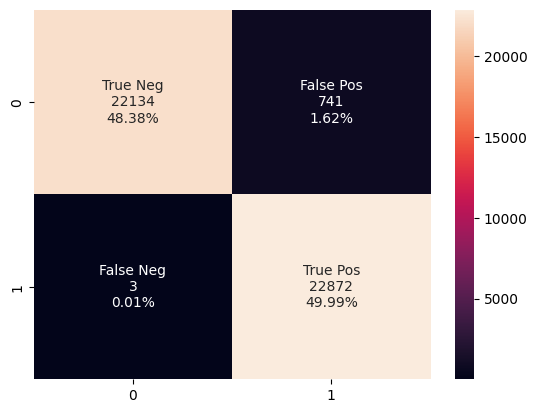

In [46]:
import numpy as np
import seaborn as sns

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                dt_cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     dt_cm.flatten()/np.sum(dt_cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(dt_cm, annot=labels, fmt='')

In [47]:
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score

vc = VotingClassifier(estimators=[('knn', knn), ('rf', rf), ('dt', dt)], voting='soft')
vc.fit(X_train,y_train)
vc_pred = vc.predict(X_test)

In [48]:
print("Votting Classifier Accuracy:", accuracy_score(y_test, vc_pred))

Votting Classifier Accuracy: 0.9873879781420765


In [49]:
vc_cm = confusion_matrix(y_test, vc_pred)
print("\nVotting Classifier Confusion Matrix:")
print(rf_cm)


Votting Classifier Confusion Matrix:
[[22171   704]
 [    9 22866]]


In [50]:
for clf, label in zip([knn, rf, dt, vc], ['KNN Classifier', 'Random Forest', 'Decision Tree', 'Voting Classifier']):
  scores = cross_val_score(clf, X, y, scoring='accuracy', cv=5)
  print("Accuracy: %0.5f (+/- %0.5f) [%s]" % (scores.mean(), scores.std(), label))

Accuracy: 0.98198 (+/- 0.00088) [KNN Classifier]
Accuracy: 0.98434 (+/- 0.00053) [Random Forest]
Accuracy: 0.98458 (+/- 0.00055) [Decision Tree]
Accuracy: 0.98862 (+/- 0.00052) [Voting Classifier]


In [51]:
models = pd.DataFrame({
    'Model' : [ 'KNN Classifier', 'Decision Tree', 'Random Forest', 'Voting Classifier'],
    'Score' : [accuracy_score(y_test, knn_pred), accuracy_score(y_test, dt_pred), accuracy_score(y_test, rf_pred), accuracy_score(y_test, vc_pred)]
})

models.sort_values(by = 'Score', ascending = False)

,Model,Score
3,Voting Classifier,0.987388
2,Random Forest,0.984415
1,Decision Tree,0.983738
0,KNN Classifier,0.982820


In [52]:
import plotly.express as px

px.bar(data_frame = models, x = 'Score', y = 'Model', color = 'Score', template = 'plotly_dark', 
       title = 'Models Comparison')

In [53]:
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.tree import DecisionTreeClassifier
#Create an instance
classifier = BalancedBaggingClassifier(estimator=DecisionTreeClassifier(),
                                sampling_strategy='not majority',
                                replacement=False,
                                random_state=42)
history = classifier.fit(X_train, y_train)
bc_preds = classifier.predict(X_test)

In [54]:
print("Balanced Bagging Accuracy:", accuracy_score(y_test, bc_preds))

Balanced Bagging Accuracy: 0.9903825136612022


In [55]:
bc_cm = confusion_matrix(y_test, bc_preds)

In [56]:
print("\nBalanced Bagging Confusion Matrix:")
print(bc_cm)


Balanced Bagging Confusion Matrix:
[[22438   437]
 [    3 22872]]


In [57]:
bc_preds

array([0, 1, 0, ..., 0, 1, 0])

In [58]:
classifier.score(X_test,y_test)

0.9903825136612022

In [59]:
from sklearn.model_selection import cross_val_score

#scores = cross_val_score(classifier,X_scaled,y,cv=5)
scores = cross_val_score(classifier,X,y,cv=5)

In [60]:
scores

array([0.99095628, 0.99005464, 0.98980874, 0.98898907, 0.9902459 ])

In [61]:
scores.mean()

0.9900109289617486

In [62]:
X_test

array([[-0.20940164, -0.4270291 , -0.31339312, ..., -0.39552743,
         1.30434135, -0.27872521],
       [ 0.85927122,  2.34176078, -0.31339312, ..., -0.39552743,
        -0.76667047, -0.27872521],
       [-0.11647356, -0.4270291 , -0.31339312, ..., -0.39552743,
        -0.76667047, -0.27872521],
       ...,
       [-0.62757797, -0.4270291 , -0.31339312, ..., -0.39552743,
         1.30434135, -0.27872521],
       [ 1.3239116 , -0.4270291 , -0.31339312, ..., -0.39552743,
         1.30434135, -0.27872521],
       [-0.99929027, -0.4270291 , -0.31339312, ...,  2.52826964,
        -0.76667047, -0.27872521]])

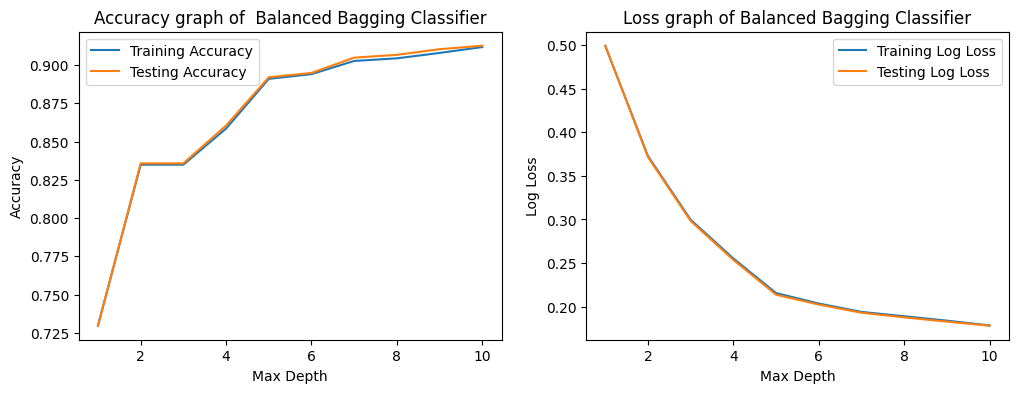

In [63]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, log_loss

# create lists to store the training and testing accuracies and losses
train_acc = []
test_acc = []
train_loss = []
test_loss = []

# fit the classifier for different values of max_depth
for depth in range(1, 11):
    # create an instance of the classifier with a different max_depth
    classifier = BalancedBaggingClassifier(estimator=DecisionTreeClassifier(max_depth=depth),
                                    sampling_strategy='not majority',
                                    replacement=False,
                                    random_state=42)
    # fit the classifier to the training data
    classifier.fit(X_train, y_train)
    
    # predict the class labels for the training and testing data
    train_preds = classifier.predict(X_train)
    test_preds = classifier.predict(X_test)
    
    # calculate the training and testing accuracies
    train_accuracy = accuracy_score(y_train, train_preds)
    test_accuracy = accuracy_score(y_test, test_preds)
    
    # calculate the training and testing log losses
    train_proba = classifier.predict_proba(X_train)
    test_proba = classifier.predict_proba(X_test)
    train_log_loss = log_loss(y_train, train_proba)
    test_log_loss = log_loss(y_test, test_proba)
    
    # append the accuracies and losses to the lists
    train_acc.append(train_accuracy)
    test_acc.append(test_accuracy)
    train_loss.append(train_log_loss)
    test_loss.append(test_log_loss)

# plot the training and testing accuracies and losses as a function of max_depth
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
ax[0].plot(range(1, 11), train_acc, label='Training Accuracy')
ax[0].plot(range(1, 11), test_acc, label='Testing Accuracy')
ax[0].set_xlabel('Max Depth')
ax[0].set_ylabel('Accuracy')
ax[0].set_title('Accuracy graph of  Balanced Bagging Classifier')
ax[0].legend()

ax[1].plot(range(1, 11), train_loss, label='Training Log Loss')
ax[1].plot(range(1, 11), test_loss, label='Testing Log Loss')
ax[1].set_xlabel('Max Depth')
ax[1].set_ylabel('Log Loss')
ax[1].set_title('Loss graph of Balanced Bagging Classifier')
ax[1].legend()

plt.show()



In [64]:
import joblib

In [65]:
save_vc = joblib.dump(vc,'vc.pkl')

In [66]:
save_bbc = joblib.dump(classifier,'bbc_after_upscale.pkl')

In [67]:
save_scaler = joblib.dump(scaler,'scaler_after_upscale.pkl')